### EDA Performance of the data

### Author: Zeru Zhou

#### Load data

In [1]:
import pandas as pd
import numpy as np

In [3]:
my_df = pd.read_csv('../data/bank-additional/bank-additional-full.csv', sep=';')
my_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
my_df.shape

(41188, 21)

#### Perform basic cleaning & Preprocessing

In [5]:
my_df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [7]:
my_df.duplicated().any()

True

In [11]:
my_df = my_df.drop_duplicates()
my_df.shape

(41176, 21)

#### Explore the dtype of each of the feature, for future analysis

In [19]:
dtypes = my_df.dtypes
dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [26]:
invert = {}
for k, v in dtypes.items():
    invert[v] = []
for k, v in dtypes.items():
    invert[v].append(k)
invert

{dtype('int64'): ['age', 'duration', 'campaign', 'pdays', 'previous'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 dtype('float64'): ['emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed']}

#### We can start our EDA with tableau

#### Export the dataset

In [29]:
my_df['y'] = my_df['y'].replace('no',0).replace('yes',1)

In [30]:
data = my_df.to_csv('data_cleaned.csv')

#### Housing status and Job types

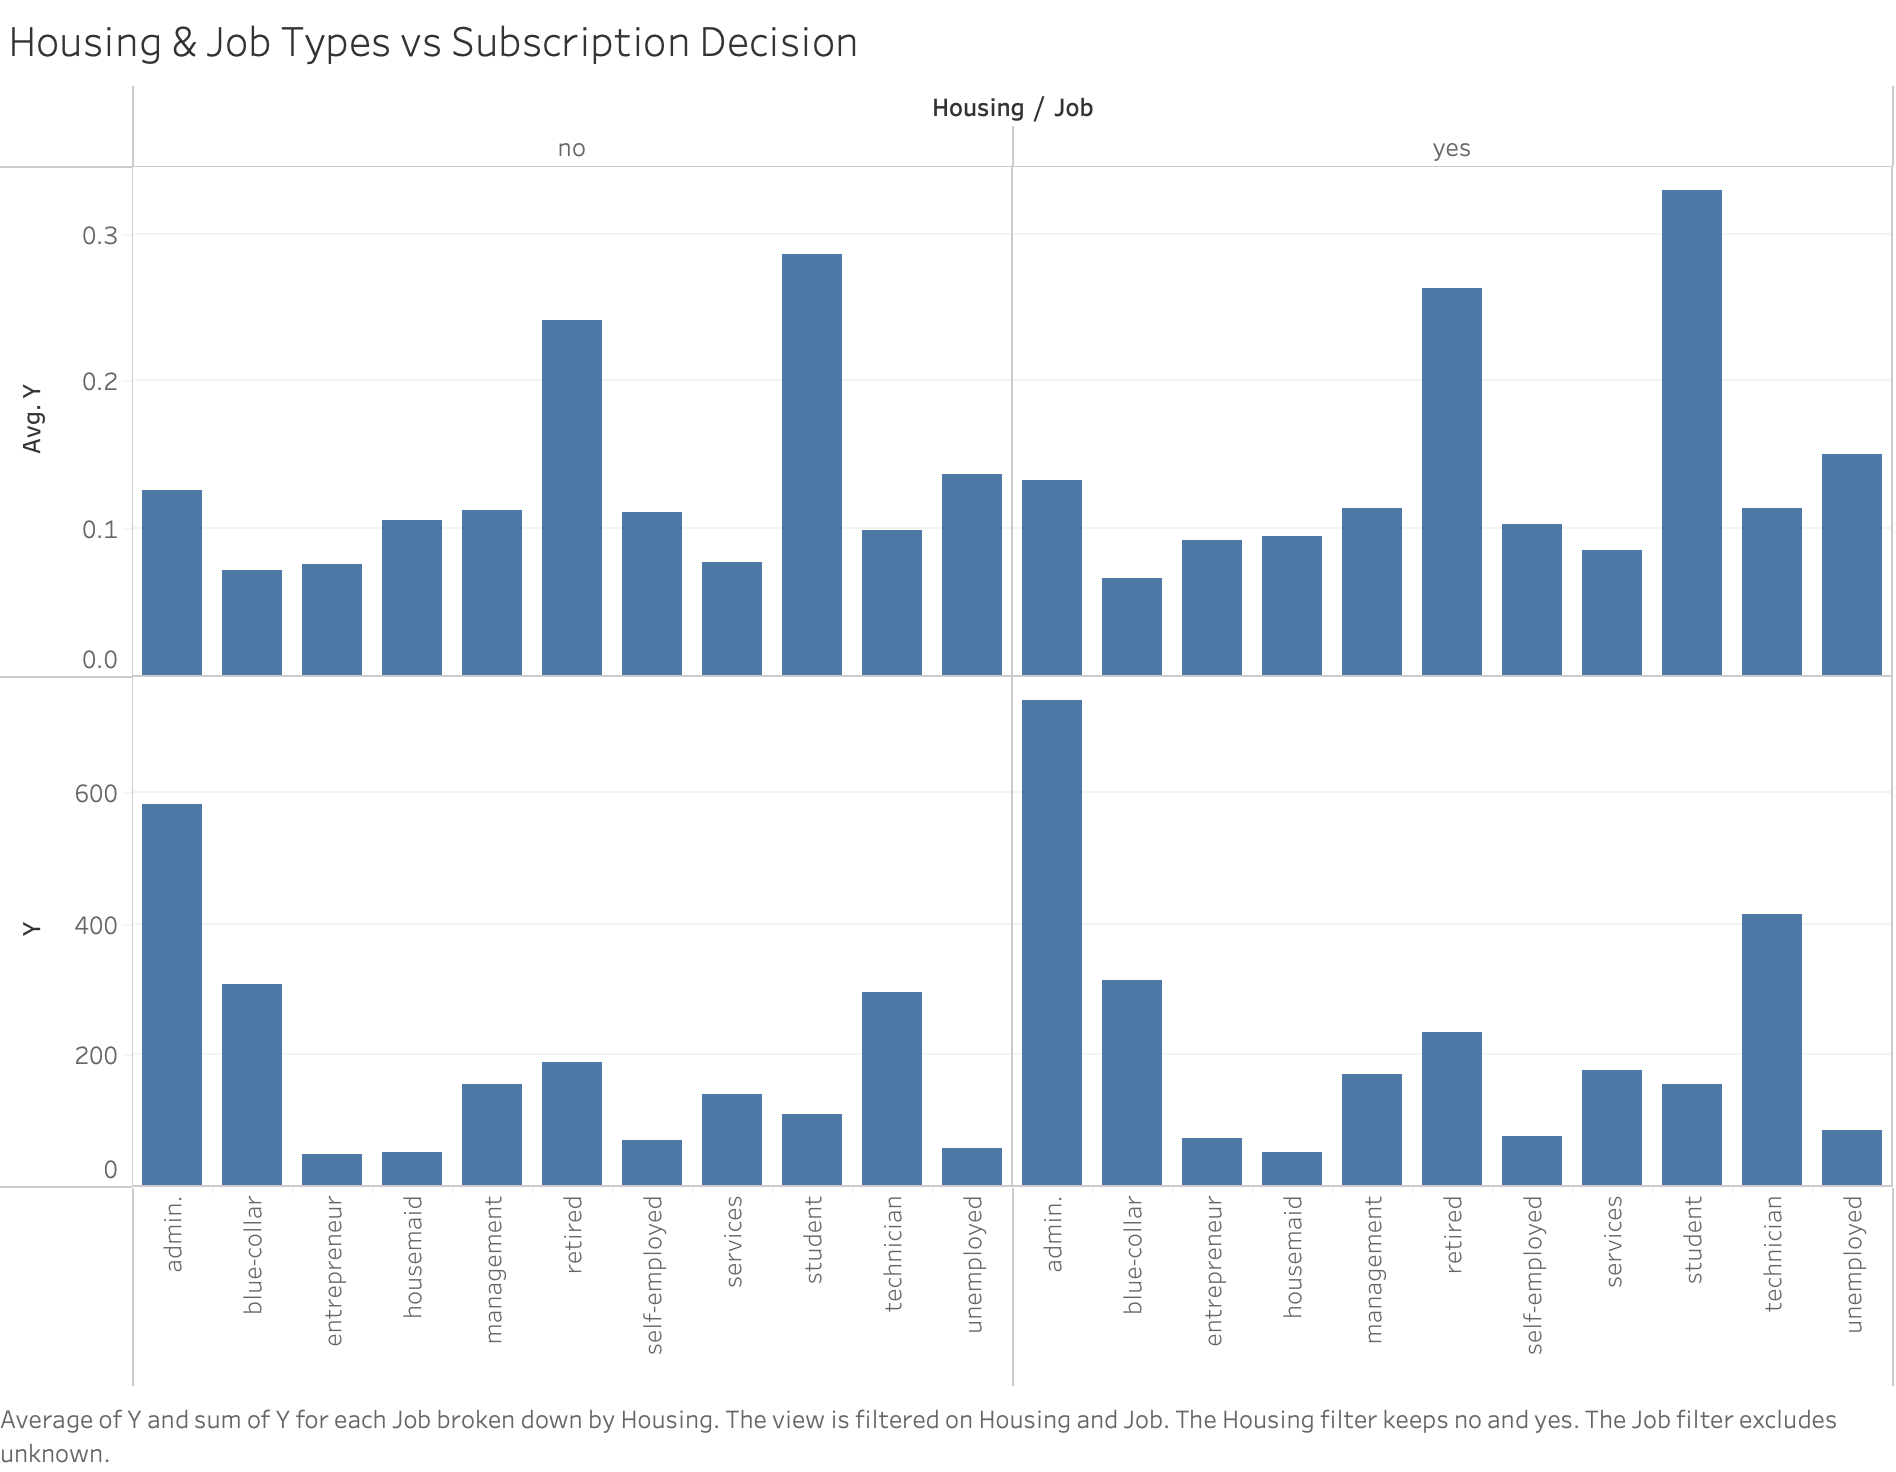

#### We can see that Housing doesn't matter the whole trend of the data at all. No matter one person has a house or not, the avg of the subscribe intention is approximately the same, with little classification power. While career does matter a lot: We can see that students/retired people, no matter of housing condition, are more inclined to subscribe than other careers.

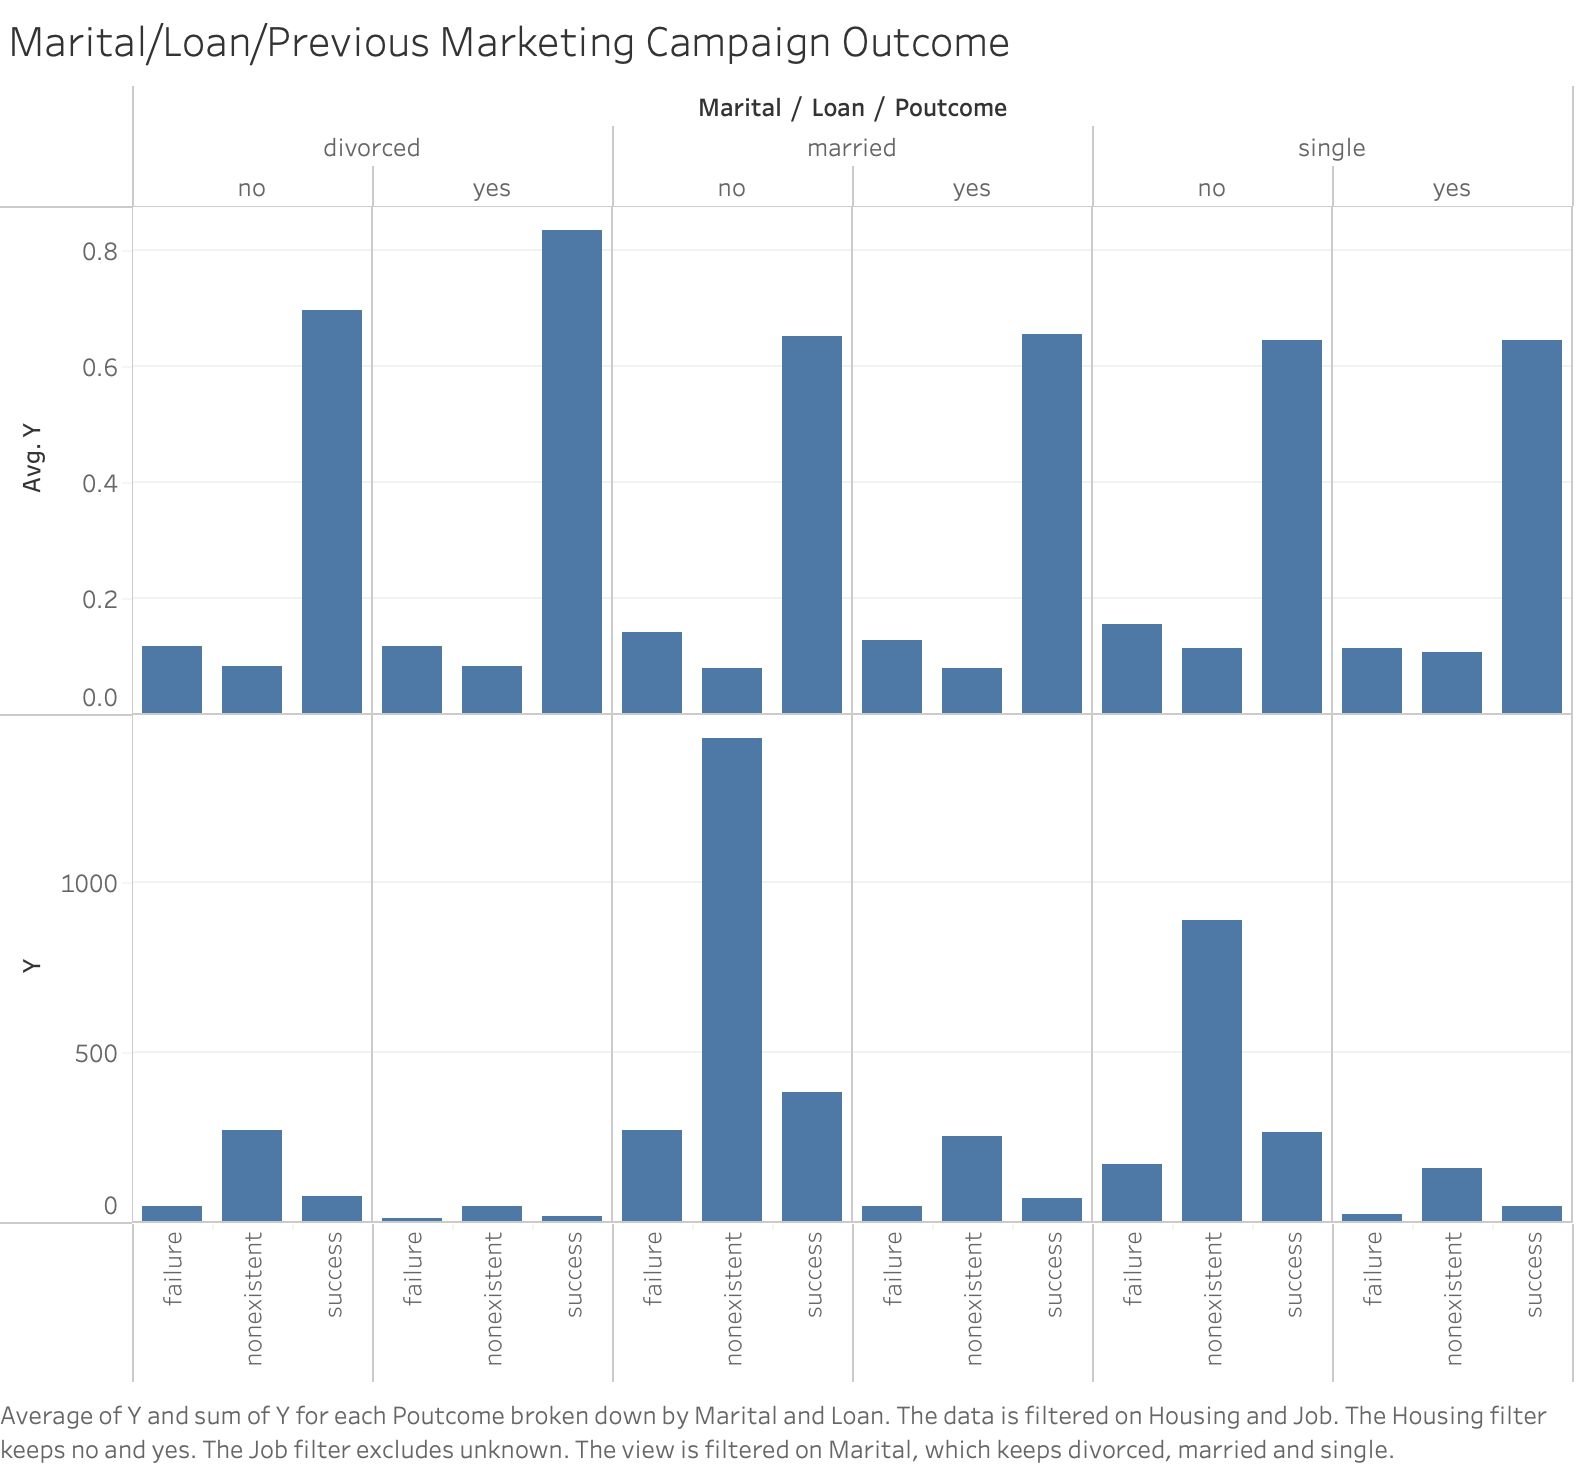

#### We found that the marital status doesn't affect the average subscription trend. The divorced people seems generally more intended to subscribe the service. People with a loan/without a loan have similiar trends of average sunscription. Noticablly, clients who have been successfully introduced by previous campaigns are more likely to subscribe the service than those who didn't. Those clients that we failed to introduce in previous marketing campaigns are slightly more likely to subcribe than those who haven't been experienced with any campaigns.

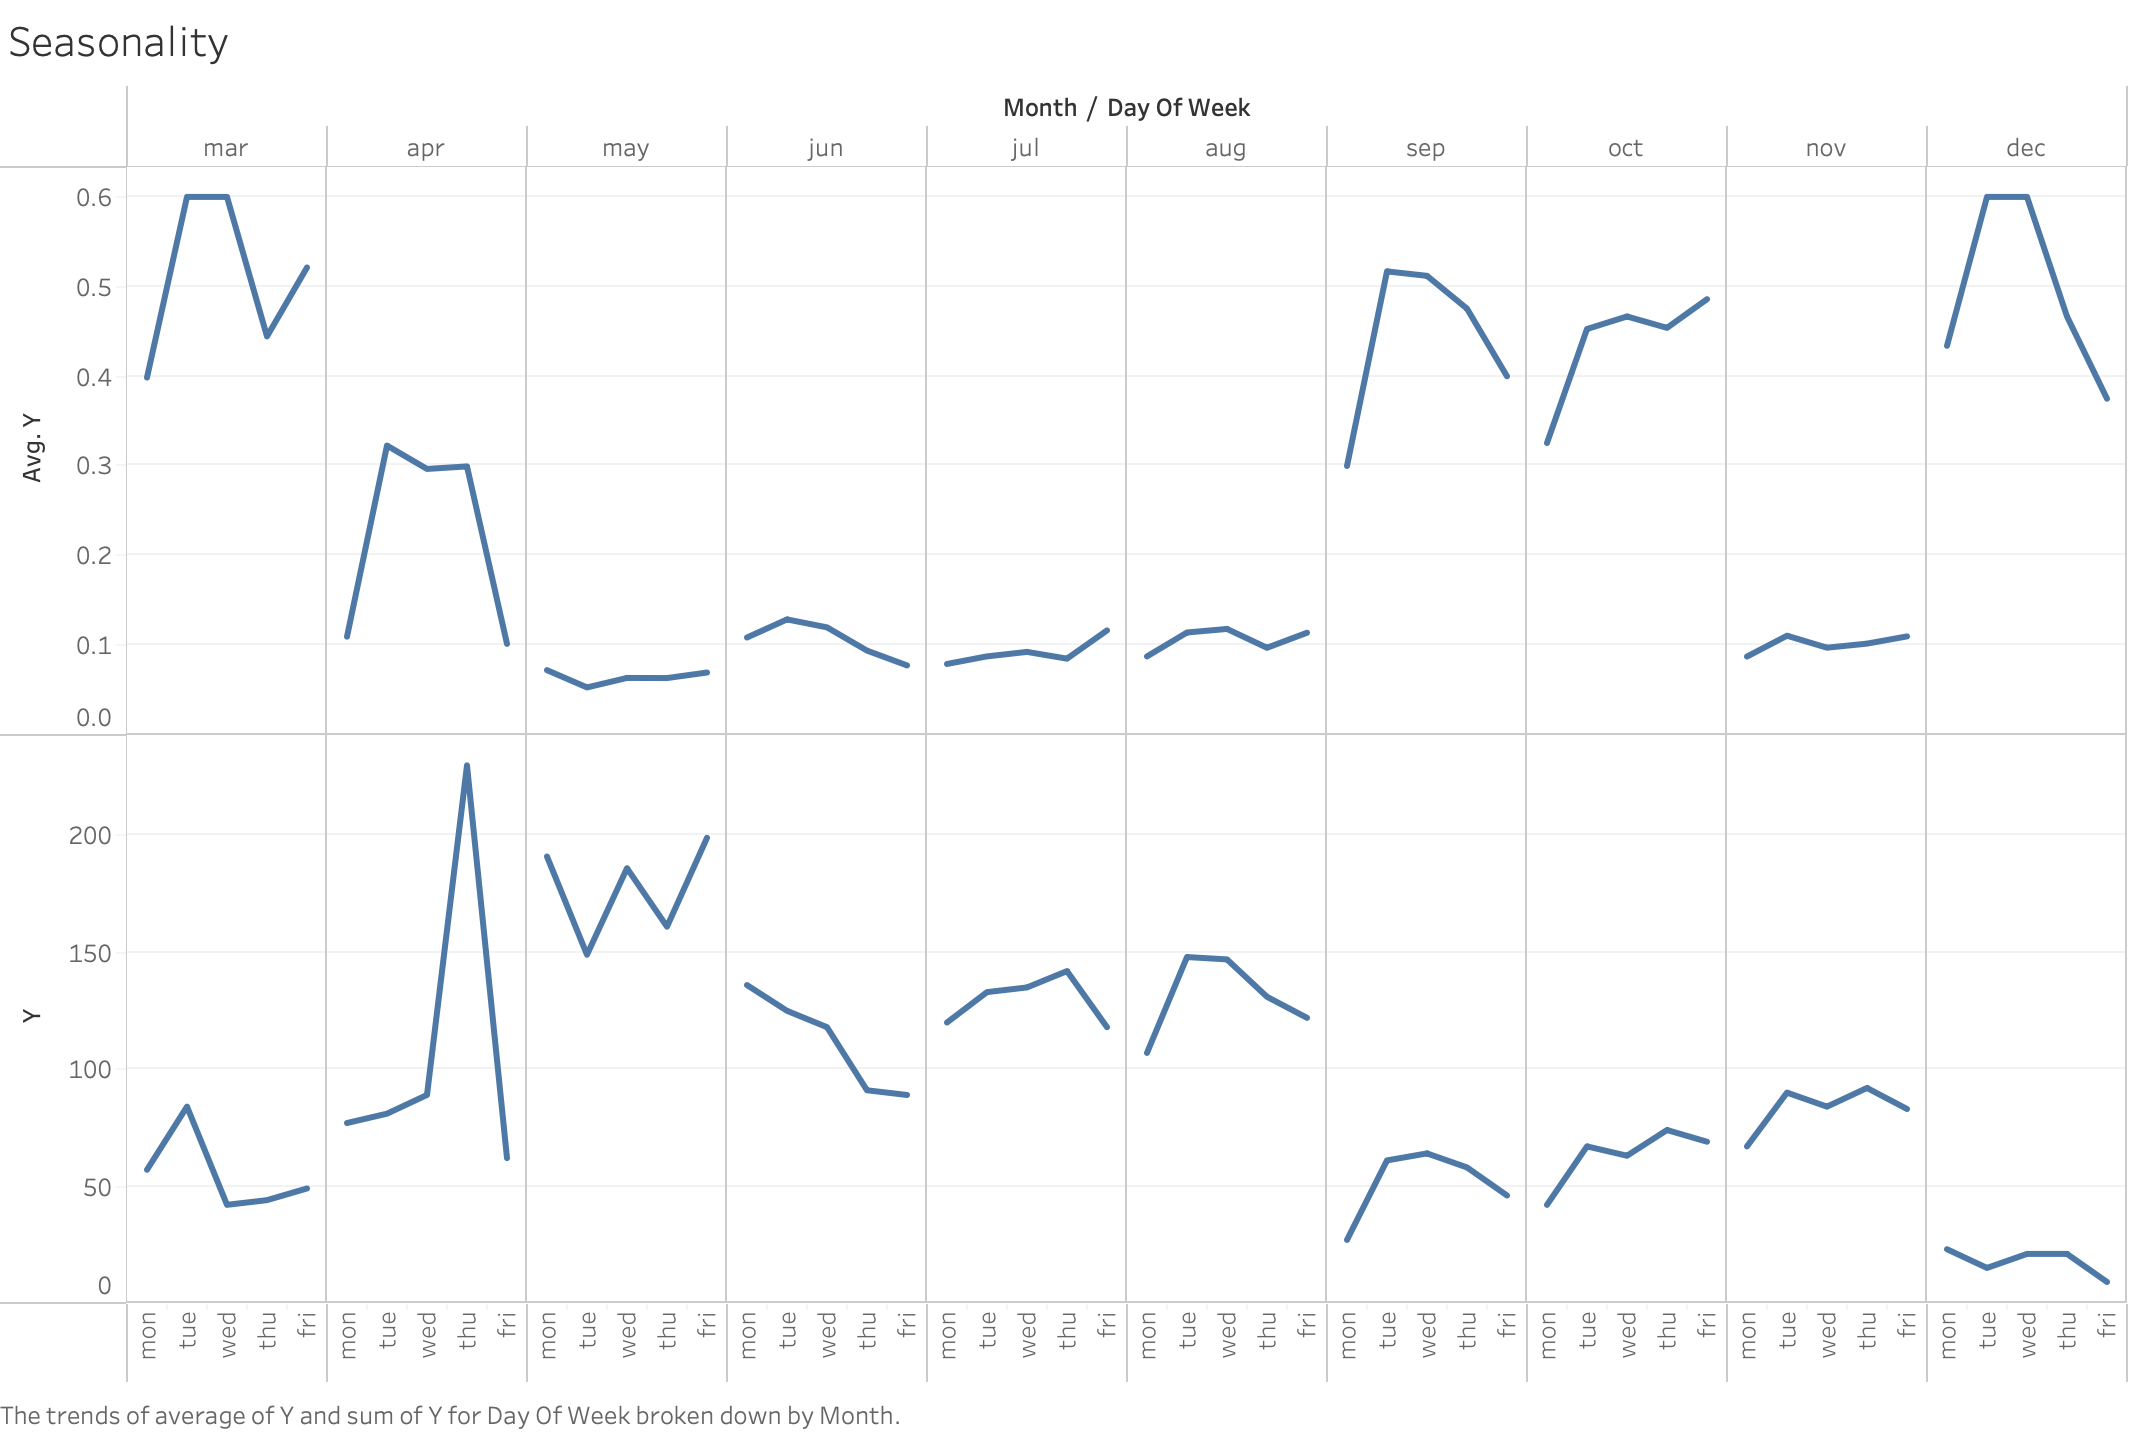

#### We can see that the total number of subscription peak at Apr, and lowest at Dec. There are some weekly seasonality patterns (for many months, average subscription rate is highest on Tue and Wed). We can design some marketing channels corresponding to the low subscription rate from May to Aug, and low total number of subscription from Sep to Dec. 

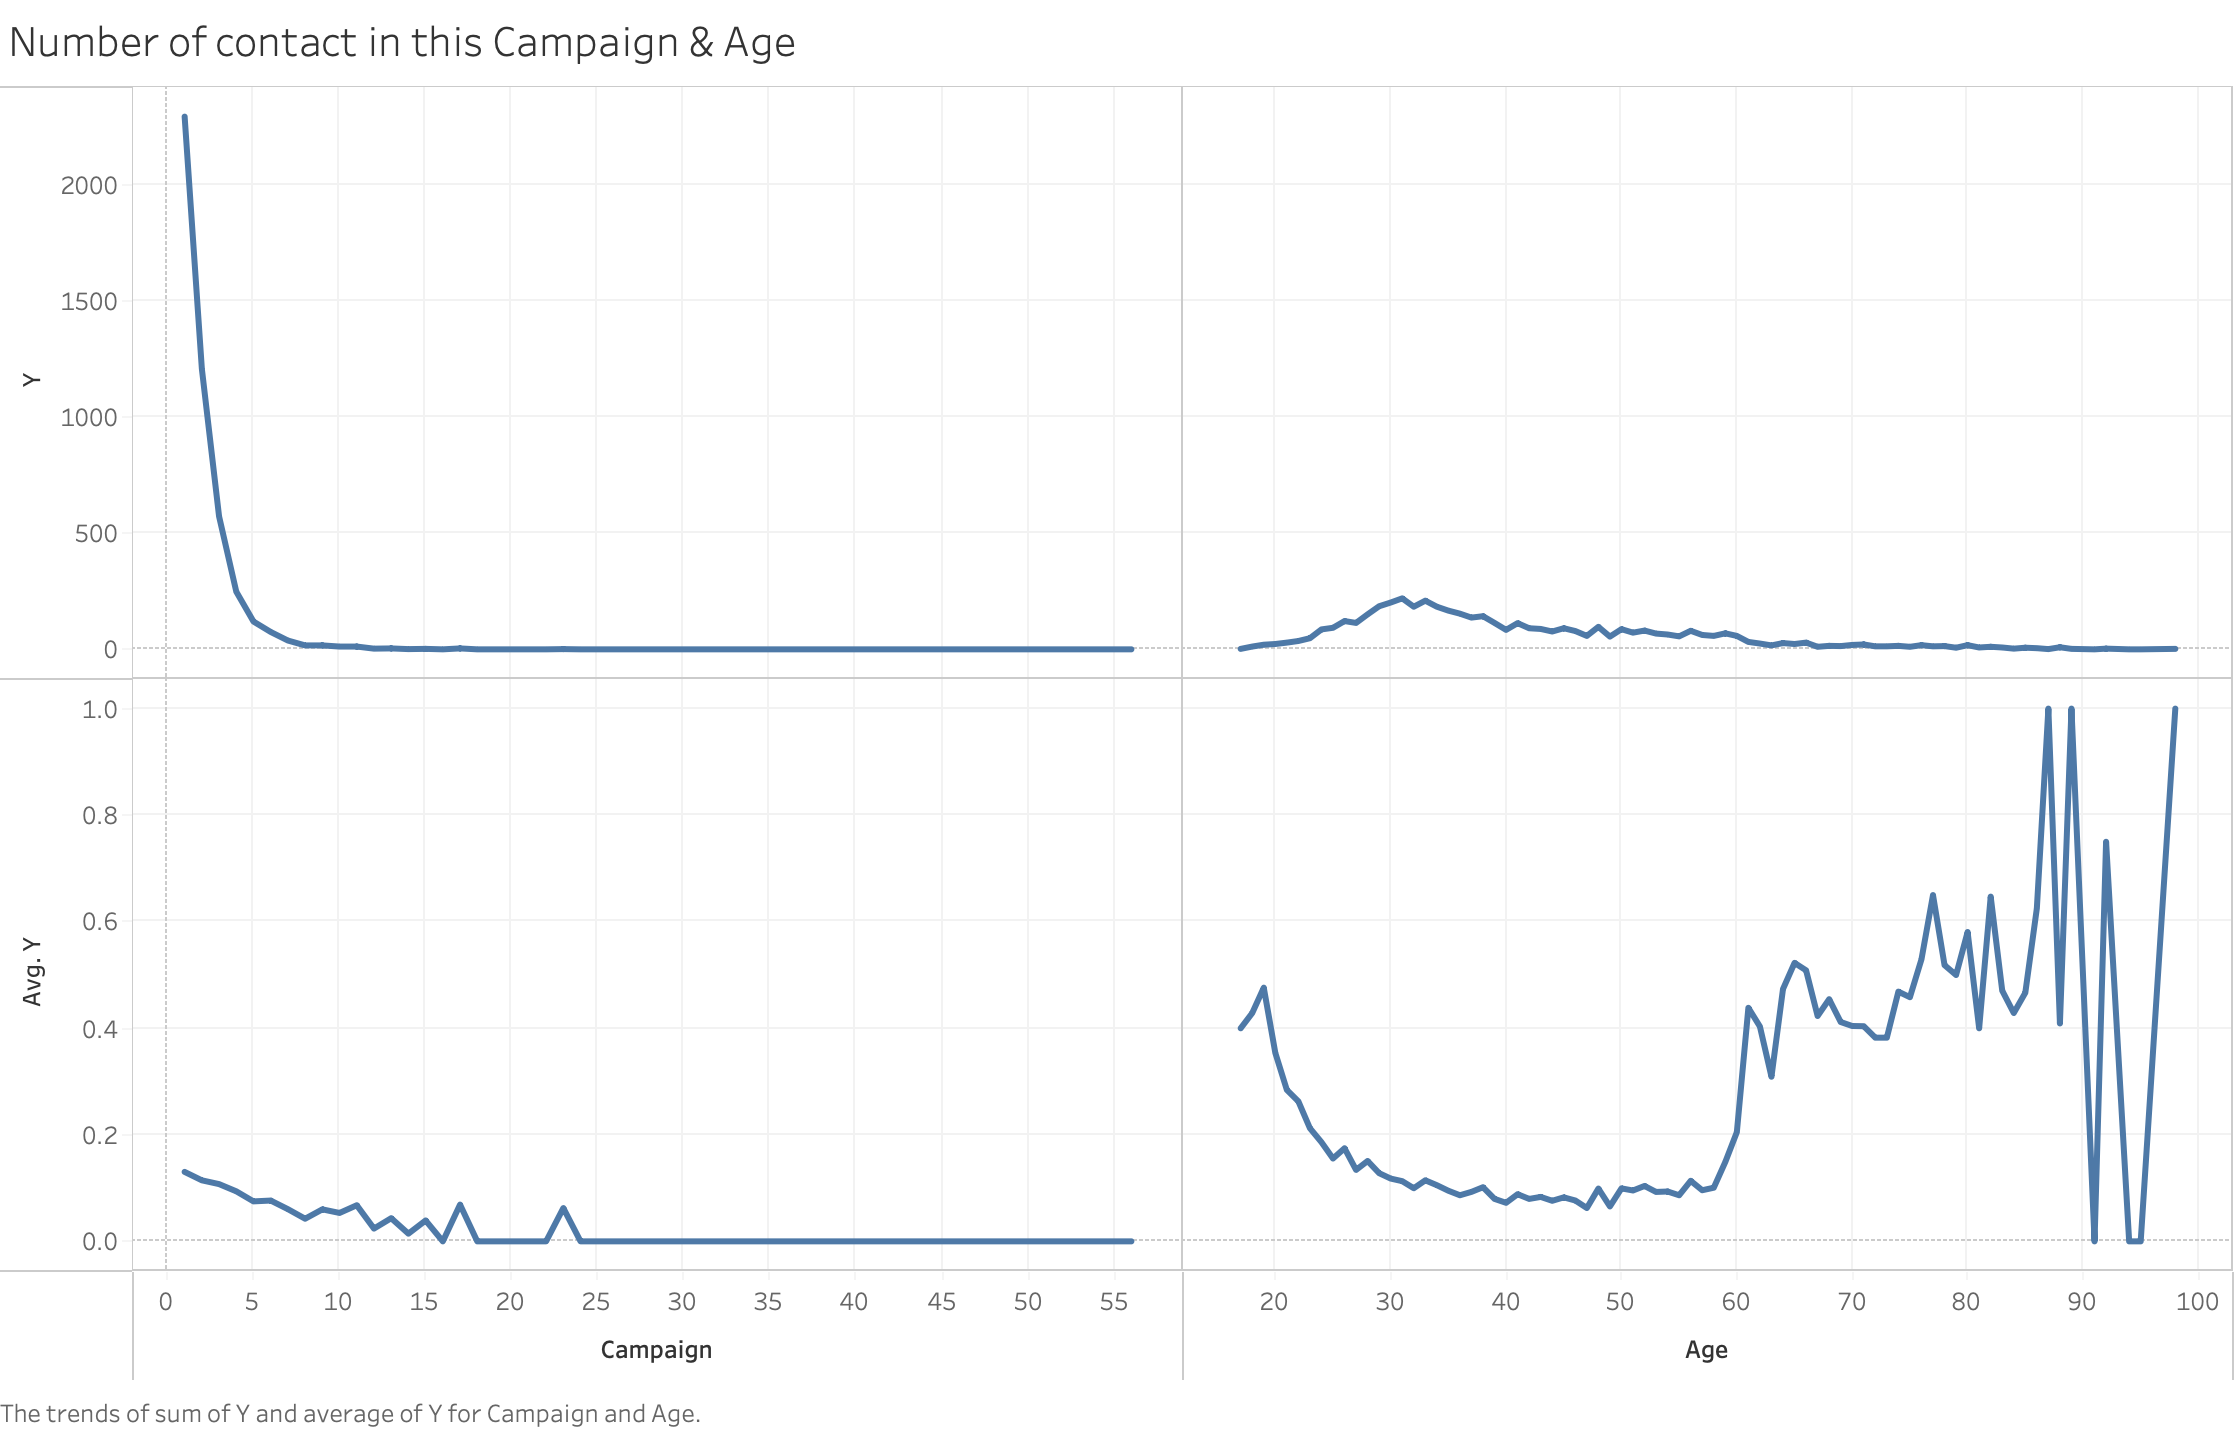

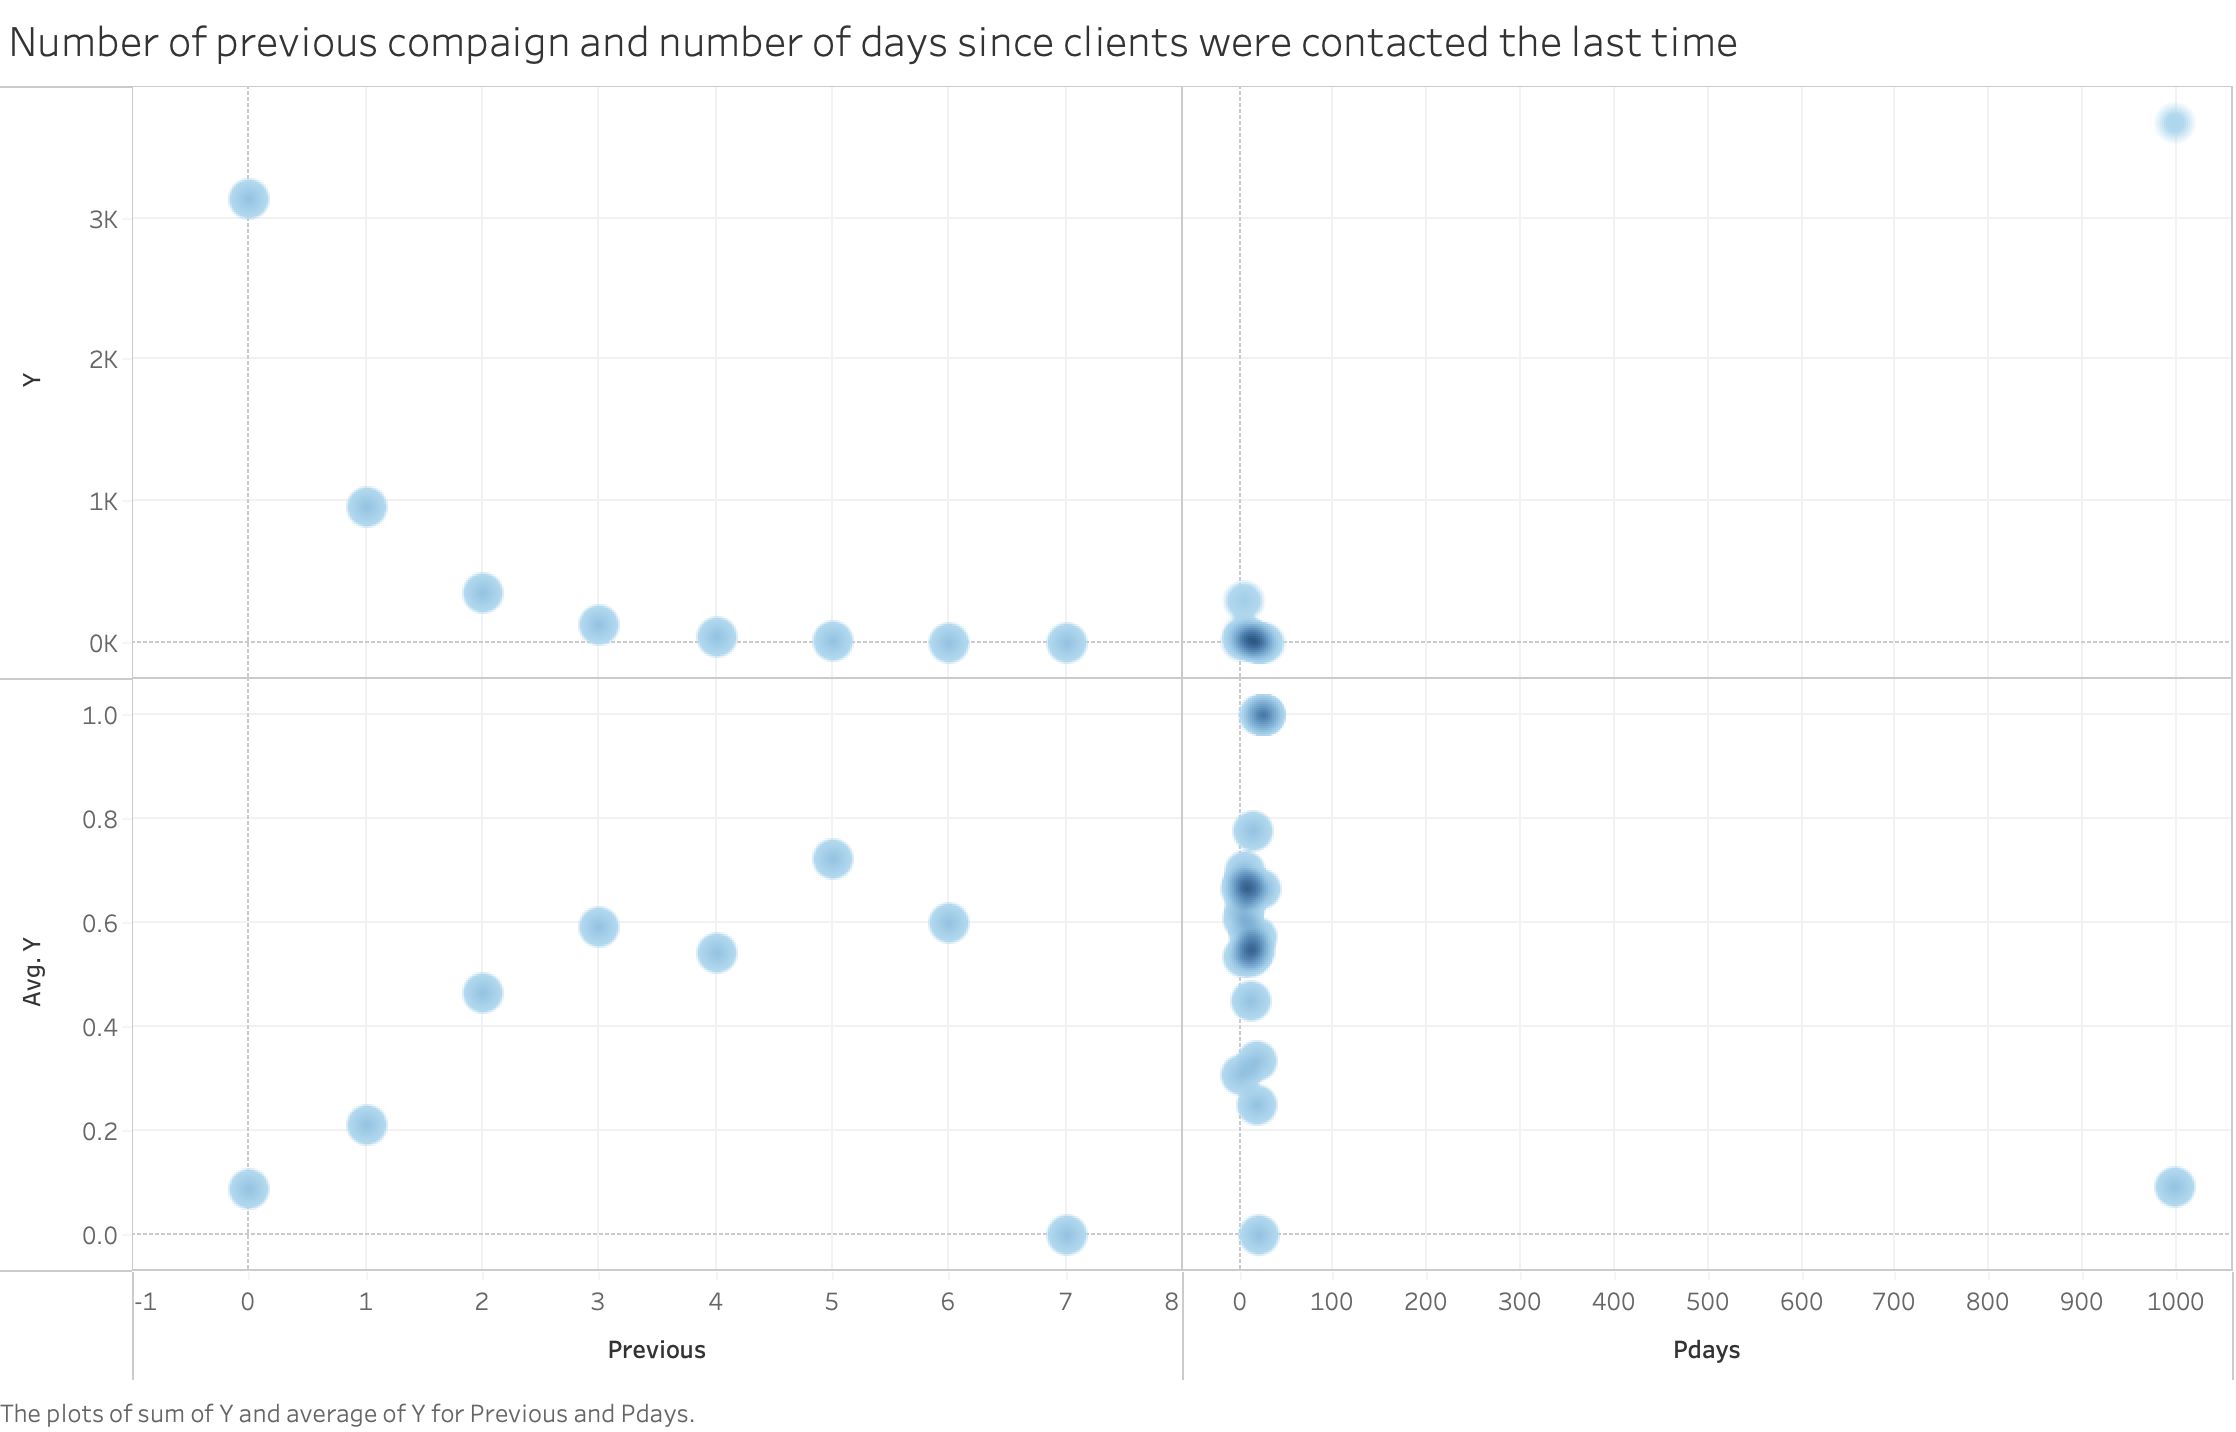

#### We can see that most of the clients haven't experienced any compaigns before. By average, clients with 5 previous campaigns are the most likely to subscribe. The number of days since the clients were contacted does not show much influence.

### As above, we analyzed the features and their potential influence to the outcome subscription decision. We found that Number of contact in the current compaign, number of previous contact, job type, education have relatively stronger influence on the outcome decision, while some other feature could help us categorize customers and help us make strategies with respect to different group of customer.

### Base on the result, we can rule out some insignificant features in advance. However, in the model building process, there is feature engineering step that use shrinkage, subset selection, dimensionality reduction to reduce the feature space/add new terms of features. If we use deep learning perceptrons, the layers will help us with feature selection automatically. This is only EDA analysis that help Layperson know the data better, we typically not manually reduce the feature space base only on observation.